## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Loading the dataset into a dataframe

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

#### Removing unwanted columns

In [5]:
unwanted_columns = ['RowNumber', 'CustomerId', 'Surname']
data = df.drop(unwanted_columns, axis=1)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [7]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
# separating categorical and numerical values
dependent_variable = 'Exited'
categorical_cols = data.nunique()[data.nunique() < 6].keys().tolist()
categorical_cols = [i for i in categorical_cols if i != dependent_variable]
numerical_cols = [i for i in data.columns if i not in categorical_cols and i != dependent_variable]

In [11]:
# creating dataset for visualization
data_plot = data.copy()
data_plot['HasCrCard'] = data_plot['HasCrCard'].replace({0:'HasNoCrCard', 1:'HasCrCard'})
data_plot['IsActiveMember'] = data_plot['IsActiveMember'].replace({0:'Inactive', 1:'Active'})
data_plot['Exited'] = data_plot['Exited'].replace({0:'Not Churned', 1:'Churned'})

In [12]:
data.describe() # or check one by one like data.mean(), data.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.mode()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,850,France,Male,37,2,0.0,1,1,1,24924.92,0


In [14]:
data[dependent_variable].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Visualizing the data

<AxesSubplot:xlabel='Exited', ylabel='count'>

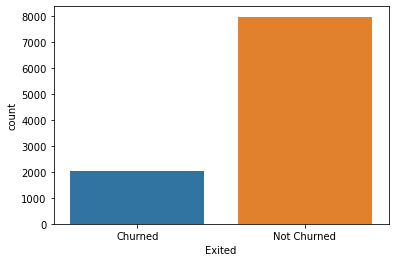

In [15]:
sns.countplot(x = data_plot[dependent_variable])

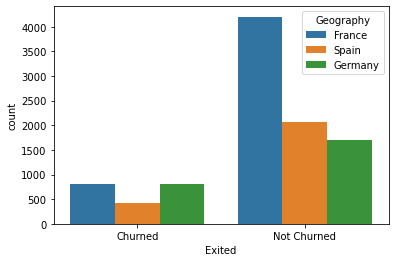

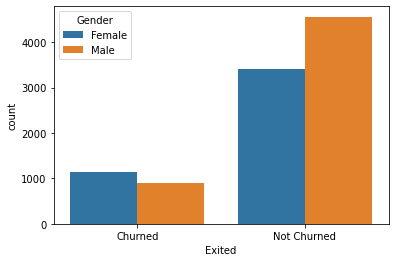

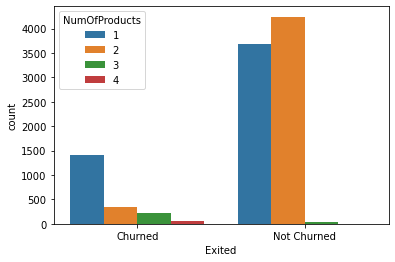

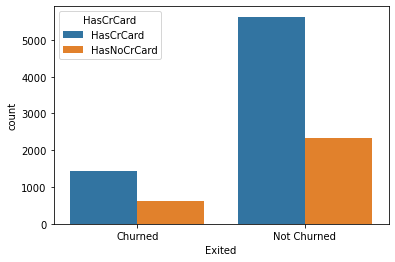

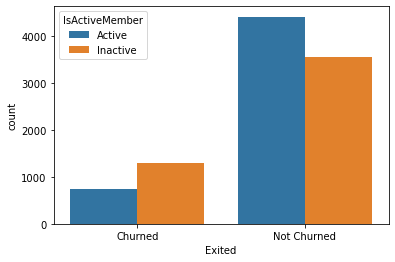

In [16]:
for i in range(len(categorical_cols)):
    plt.figure(i)
    sns.countplot(x = data_plot[dependent_variable], hue = data_plot[categorical_cols[i]])

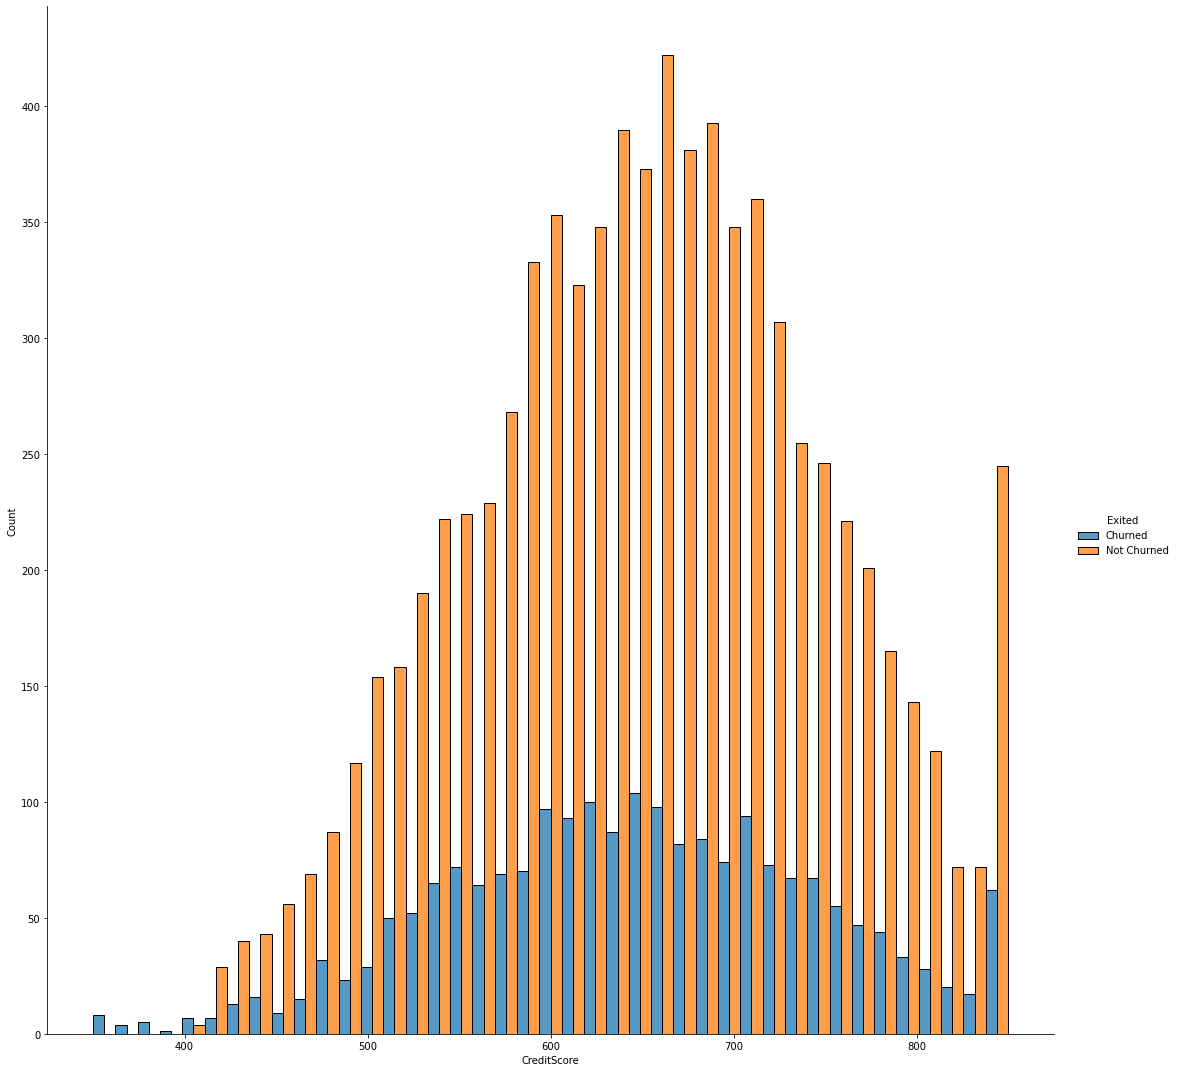

In [17]:
sns.displot(data_plot, x = 'CreditScore', hue= 'Exited', multiple='dodge', height=15)

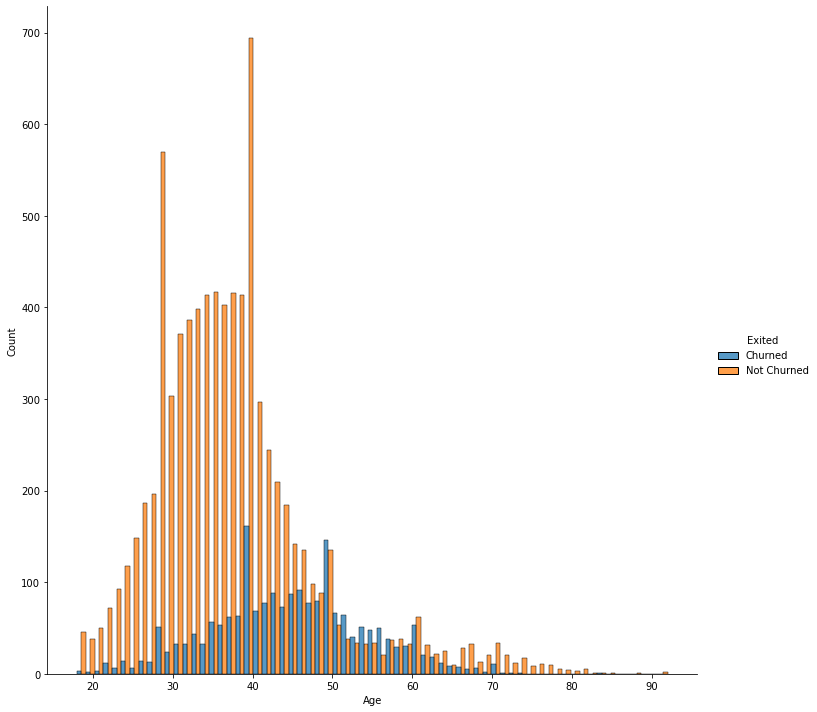

In [18]:
sns.displot(data_plot, x = 'Age', hue= 'Exited', multiple='dodge', height=10)

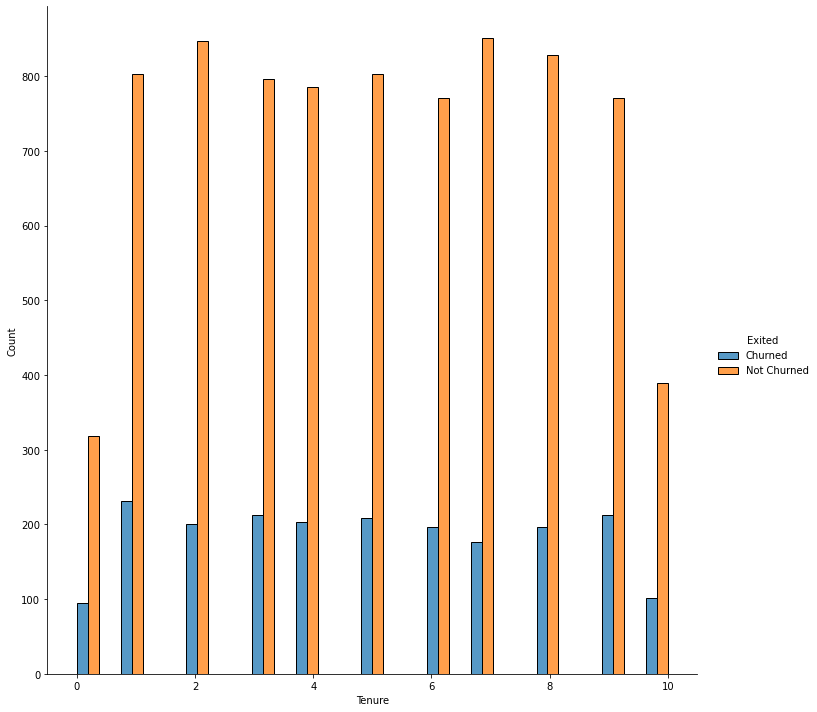

In [19]:
sns.displot(data_plot, x = 'Tenure', hue= 'Exited', multiple='dodge', height=10)

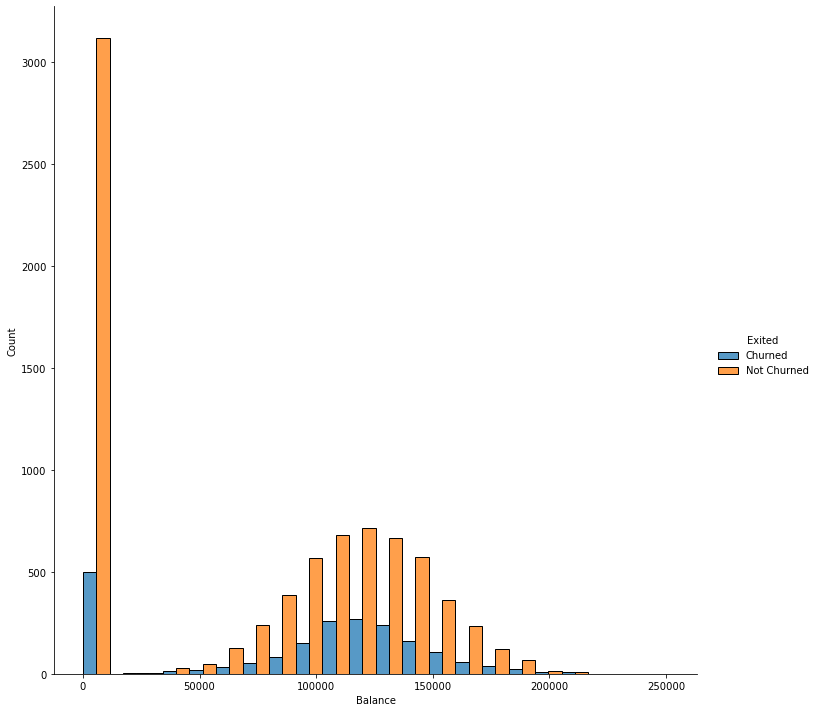

In [20]:
sns.displot(data_plot, x = 'Balance', hue= 'Exited', multiple='dodge', height=10)

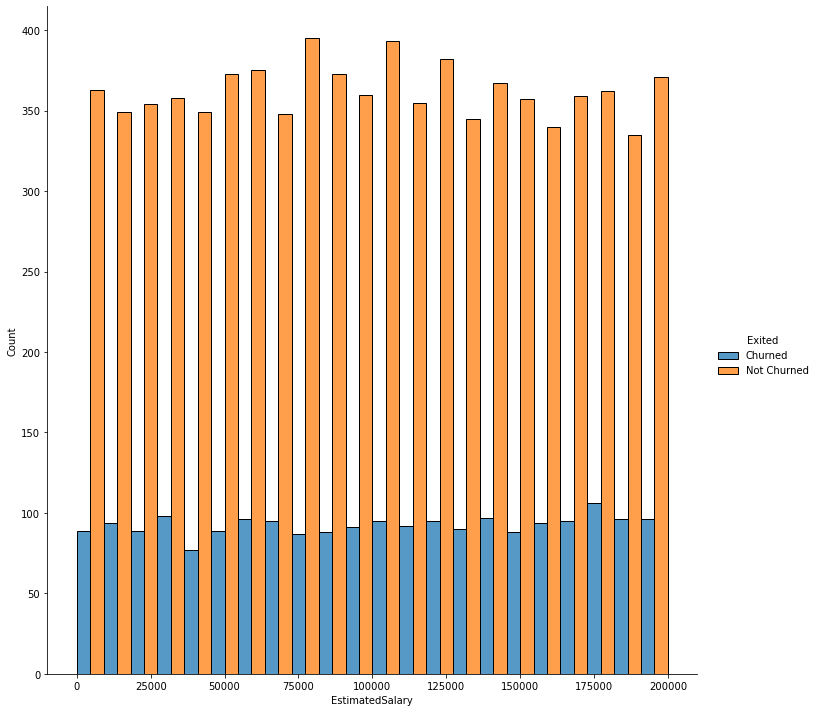

In [21]:
sns.displot(data_plot, x = 'EstimatedSalary', hue= 'Exited', multiple='dodge', height=10)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [23]:
# checking for missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
# getting the correlation of the data
data.iloc[:,:-1].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<AxesSubplot:>

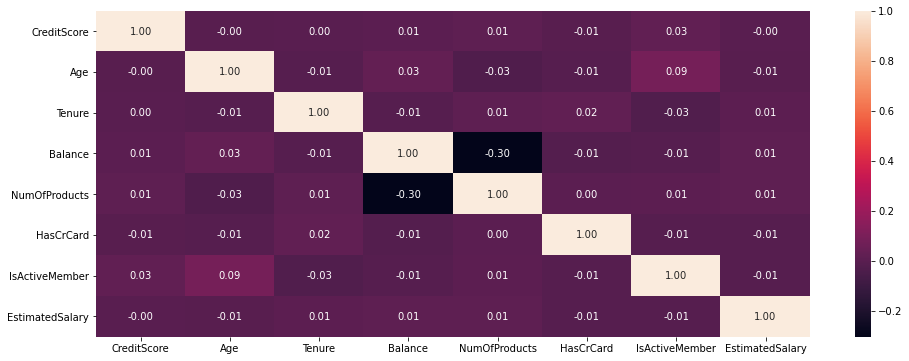

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, fmt='.2f')

### Preprocessing data for training

In [26]:
# create dataset with dummy values for Gender and Geography
Gender=pd.get_dummies(data['Gender'], drop_first=True)
Geography = pd.get_dummies(data['Geography'], drop_first=True)
data=pd.concat([data,Gender, Geography], axis=1)

#Delete existing column after concatenating encoded columns
data.drop(['Gender','Geography'], axis=1, inplace=True)

In [27]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Scaling all the columns of the dataset to same scale
scaler = StandardScaler()

In [30]:
scaler.fit(data.drop(columns=['Exited']))

StandardScaler()

In [31]:
scaled_features = scaler.transform(data.drop(columns=['Exited'],axis=1))

In [32]:
len(scaled_features[0])

11

In [34]:
scaled_features

array([[-0.32622142,  0.29351742, -1.04175968, ..., -1.09598752,
        -0.57873591, -0.57380915],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.09598752,
        -0.57873591,  1.74273971],
       [-1.53679418,  0.29351742,  1.03290776, ..., -1.09598752,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.09598752,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.91241915,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -1.09598752,
        -0.57873591, -0.57380915]])

In [35]:
feature_column_names = data.columns.drop('Exited')

In [36]:
feature_column_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain'],
      dtype='object')

In [37]:
# create dataframe using the scaled data created above 
scaled_df = pd.DataFrame(scaled_features,columns=feature_column_names)
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-0.578736,1.742740


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the dataset to train test with 70:30 ratio
# scaled df is the dataframe without our dependent variable i.e. Exited
# df['Exited'] gives us our dependent variable
X_train, X_test, y_train, y_test = train_test_split(scaled_df,df['Exited'],
                                                    test_size=0.30)

In [40]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
5279,0.015222,0.102810,0.687130,0.384417,-0.911583,0.646092,0.970243,0.425346,-1.095988,-0.578736,1.742740
9606,-1.309165,0.484225,1.724464,0.674471,0.807737,-1.547768,-1.030670,-0.312533,0.912419,-0.578736,-0.573809
5295,0.573948,-0.946079,0.341352,1.747892,-0.911583,0.646092,-1.030670,1.233704,-1.095988,1.727904,-0.573809
4443,0.335972,-0.660018,-1.733315,0.988636,0.807737,0.646092,0.970243,1.532203,-1.095988,1.727904,-0.573809
6365,0.956779,0.865639,-0.004426,0.668680,0.807737,-1.547768,-1.030670,1.502391,-1.095988,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...
4206,-0.481423,0.770285,1.032908,-0.230649,2.527057,-1.547768,-1.030670,-1.578611,-1.095988,-0.578736,-0.573809
4601,-0.088246,-0.850726,1.032908,0.929755,-0.911583,-1.547768,-1.030670,-0.988386,0.912419,1.727904,-0.573809
6733,0.180771,-1.041433,-0.350204,0.491317,-0.911583,0.646092,-1.030670,1.615933,0.912419,-0.578736,-0.573809
4656,1.991456,-0.087897,1.032908,0.936009,-0.911583,0.646092,0.970243,-1.552598,-1.095988,-0.578736,-0.573809


## Model training

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# start with default value of k=5
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

Predicting on test set

In [44]:
pred = knn.predict(X_test)

### Model evaluation

In [45]:
pd.Series(pred).value_counts()

0    2647
1     353
dtype: int64

In [46]:
y_test.value_counts()

0    2393
1     607
Name: Exited, dtype: int64

In [47]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [48]:
confusion_matrix(y_test, pred)

array([[2261,  132],
       [ 386,  221]], dtype=int64)

In [49]:
accuracy_score(y_test, pred)

0.8273333333333334

<AxesSubplot:>

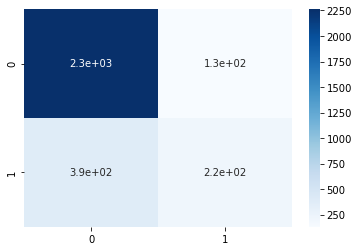

In [50]:
sns.heatmap(confusion_matrix(y_test,pred),cmap = 'Blues', annot=True)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2393
           1       0.63      0.36      0.46       607

    accuracy                           0.83      3000
   macro avg       0.74      0.65      0.68      3000
weighted avg       0.81      0.83      0.81      3000



In [52]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

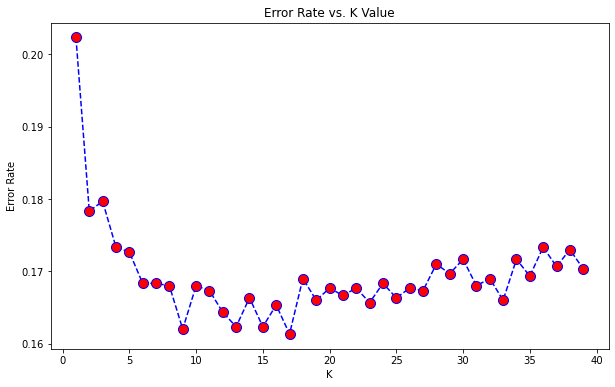

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=1




              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2393
           1       0.50      0.46      0.48       607

    accuracy                           0.80      3000
   macro avg       0.68      0.67      0.68      3000
weighted avg       0.79      0.80      0.79      3000



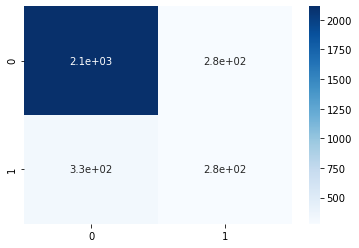

In [54]:
# K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='Blues',annot=True)
print('\n')
print(classification_report(y_test,pred))

WITH K=7




              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2393
           1       0.76      0.29      0.42       607

    accuracy                           0.84      3000
   macro avg       0.80      0.64      0.67      3000
weighted avg       0.83      0.84      0.81      3000



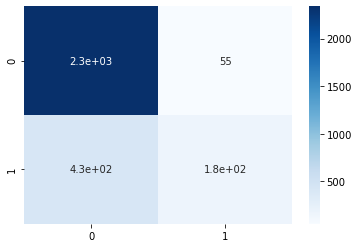

In [55]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='Blues',annot=True)
print('\n')
print(classification_report(y_test,pred))

In [56]:
accuracy_score(y_test, pred)

0.8386666666666667